 # Contexto comercial


Nos encontramos dentro del equipo de Data Science del banco "Buenos Amigos". Su objetivo es dar resguardo a a los ahorradores argentinos frente a la inflacion,proporcionando plazos fijos con tasas de interes reales positivas.
En base a los depositos  se otorgan prestamos al publico en general. Es importante conocer previamente las  caracteristicas del individio a quien se le orotoga el prestamo para reducir la probabilidad de defaul y poder cumplir con nuestros depositantes.

 # Problema comercial

Cuando  un individuo X solicita un prestamos. Si el banco no cuenta con informacion crediticia previa de este cliente se arriesga a otorgarle  dinero a un individuo que quiza no lo devuelva.

En base a este problema planteamos las pregunta guia de este trabajo: ¿Que variables son relevantes para conocer previamente si el individuo incurre en default o no?
¿Que modelo nos da mayor certeza a la hora de predecir si un individuo caera en default?

 # Data Adquisicion

**Datos**

***  Credit record ***
*   ID: Número de cliente (Cualitativa normal).
*   Months Balance: El mes de los datos extraídos es el punto de partida, al revés, 0 es el mes actual, -1 es el mes anterior, etc. (Cuantitativa discreta)

*   Status: Indica el estado del cliente (Cuantitativa discreta) 0 = 1-29 dias de atraso en el pago de la deuda, 1= 30-59 días de atraso en el pago de la deuda, 2=60-89 días de atraso en el pago de la deuda, 3=90-119 días de atraso en el pago de la deuda, 4=120-140 días de atraso en el pago de la deuda, 5= Deudas atrasadas o incobrables (más de 150 días de atraso), C= pagado este mes X=no hay préstamo este mes.



*** Application record ***


*   ID: Número de cliente (Cuantitativa discreta).
*   code gender: Género (Cualitativa Normal).

*    Flag own car: ¿Hay un auto? (Cualitativa Normal).

*   Flag own reality:¿Hay una propiedad? (Cualitativa Normal).
*   cnt children: Número de hijos (Cuantitativa discreta).


*   name income type: Categoría de ingresos (Cuantitativa Ordinal).

*   name education type: Nivel de educación (Cuantitativa Ordinal).

*   name family status: Estado civil (Cualitativa Normal).

*   name housing type: Modo de vivir (Cualitativa Normal).
*   Days Birthday: Días para el cumpleaños. Cuenta hacia atrás, -1 significa ayer. (Cuantitativa continua).


*   Flag Móvil: ¿Hay algun telefono movil? (Cualitativa Normal).

*   Flag_email: ¿Tiene email? (Cualitativa Normal).

*    Occupation Type: Ocupación (Cuantitativa Ordinal).
*    cnt fam members: Tamaño de la familia (Cuantitativa discreta).







In [ ]:
pip install pyxlsb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
url_credito= "https://github.com/RenzoTenaglia/Data-Science/blob/main/credit_record.csv?raw=true"
url_caract="https://github.com/RenzoTenaglia/Proyecto--Default-Crediticio/blob/main/application_record1.xlsb?raw=true"

caract=pd.read_excel(url_caract,engine="pyxlsb")
credito=pd.read_csv(url_credito)
data=pd.merge(caract,credito, how= "inner")

In [ ]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


# Data Wrangling

In [ ]:
#Limpieza de duplicados
print("Numero de dupliciados en la data:",data["ID"].duplicated().sum())
print("Tamaño de data con duplicados:",data.shape)
data=data.drop_duplicates("ID")
print("Tamaño de data sin duplicados:",data.shape)


Numero de dupliciados en la data: 741258
Tamaño de data con duplicados: (777715, 20)
Tamaño de data sin duplicados: (36457, 20)


In [ ]:
data["ingreso_percap_familiar"]=data["AMT_INCOME_TOTAL"]/data["CNT_FAM_MEMBERS"] #Creamos la variable ingreso percapita familiar
data["DAYS_BIRTH"] = data["DAYS_BIRTH"]//-360 #Transformamos

print(data["DAYS_BIRTH"].value_counts())   #### REVISAR  LA VARIABLE DIAS PARA CUMPLEAÑOS, ESTAN TODAS EN 0

39    1140
28    1124
40    1104
41    1087
37    1065
42    1064
34    1060
29    1027
35    1021
30    1020
38    1011
44    1008
33    1003
36     963
32     963
43     949
45     914
31     893
47     890
52     885
27     880
51     871
48     863
55     855
49     849
57     814
60     807
61     790
54     774
58     769
46     747
50     711
53     708
59     708
63     661
56     649
64     555
62     509
65     506
26     504
25     459
66     300
24     276
67     254
23     200
68     128
22      85
69      26
21       7
20       1
Name: DAYS_BIRTH, dtype: int64


<ipython-input-137-5b2691da1501>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ingreso_percap_familiar"]=data["AMT_INCOME_TOTAL"]/data["CNT_FAM_MEMBERS"] #Creamos la variable ingreso percapita familiar
<ipython-input-137-5b2691da1501>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["DAYS_BIRTH"] = data["DAYS_BIRTH"]//-360 #Transformamos


Text(0.5, 1.0, 'Densidad del ingreso')

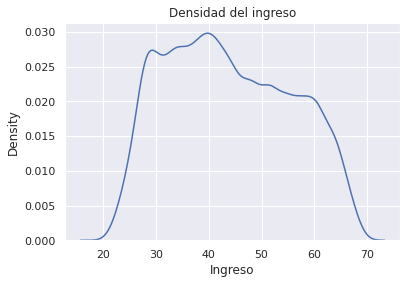

In [ ]:
data["DAYS_BIRTH"]
sns.kdeplot(data=data,x="DAYS_BIRTH")
plt.xlabel("Ingreso")
plt.title("Densidad del ingreso")

In [ ]:
#Comprobamos si las variables binarias estan conformadas por 2 grupos
binarias=["FLAG_MOBIL","FLAG_WORK_PHONE","FLAG_PHONE","FLAG_EMAIL","FLAG_OWN_CAR","CODE_GENDER","FLAG_OWN_REALTY"]

for x in binarias:
    print(x)
    print(data[x].value_counts())
    print()

FLAG_MOBIL
1    36457
Name: FLAG_MOBIL, dtype: int64

FLAG_WORK_PHONE
0    28235
1     8222
Name: FLAG_WORK_PHONE, dtype: int64

FLAG_PHONE
0    25709
1    10748
Name: FLAG_PHONE, dtype: int64

FLAG_EMAIL
0    33186
1     3271
Name: FLAG_EMAIL, dtype: int64

FLAG_OWN_CAR
N    22614
Y    13843
Name: FLAG_OWN_CAR, dtype: int64

CODE_GENDER
F    24430
M    12027
Name: CODE_GENDER, dtype: int64

FLAG_OWN_REALTY
Y    24506
N    11951
Name: FLAG_OWN_REALTY, dtype: int64



In [ ]:
data=data.drop("FLAG_MOBIL",axis=1) #Eliminamos  la variable FLAG_MOBIL ya que todos tienen telefono


<AxesSubplot:>

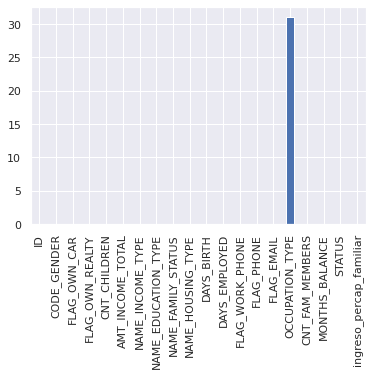

In [ ]:
#Identificacion de nulos
nulos=(data.isnull().sum()/data.shape[0])*100
nulos.plot(kind="bar")

In [ ]:
#Remplazamos los nulos por "Ocupacion sin definir" para no eliminar toda la variable o remplazar por valores que sesgen a la hora de correr el modelo
data["OCCUPATION_TYPE"]=data["OCCUPATION_TYPE"].fillna("Undefined occupation")
data["OCCUPATION_TYPE"].value_counts()

Undefined occupation     11323
Laborers                  6211
Core staff                3591
Sales staff               3485
Managers                  3012
Drivers                   2138
High skill tech staff     1383
Accountants               1241
Medicine staff            1207
Cooking staff              655
Security staff             592
Cleaning staff             551
Private service staff      344
Low-skill Laborers         175
Waiters/barmen staff       174
Secretaries                151
HR staff                    85
Realty agents               79
IT staff                    60
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
data=data.replace(["Y","N"],[1,0])
data=data.replace(["M","F"],[1,0])

In [ ]:
data["SITUACION"]=data["STATUS"]           #Separamos a los clientes segun su condicion crediticia, si pago su credito o no o si nunca tuvo uno



for x in range(len(data["SITUACION"])):
  if data["SITUACION"].iloc[x] == "X":
    data["SITUACION"].iloc[x]= "Nunca pidio un prestamo"

  elif data["SITUACION"].iloc[x] == "C":
    data["SITUACION"].iloc[x]= "Pago su prestamo"

  elif data["SITUACION"].iloc[x] == "0":
    data["SITUACION"].iloc[x] = "Deudor"

  elif data["SITUACION"].iloc[x] == "1":
    data["SITUACION"].iloc[x] = "Deudor"

  elif data["SITUACION"].iloc[x] == "2":
    data["SITUACION"].iloc[x] = "Deudor"

  elif data["SITUACION"].iloc[x] == "3":
    data["SITUACION"].iloc[x] = "Deudor"

  elif data["SITUACION"].iloc[x] == "4":
    data["SITUACION"].iloc[x] = "Deudor"

  elif data["SITUACION"].iloc[x] == "5":
    data["SITUACION"].iloc[x] = "Deudor"

#Esto se hace siguiendo el metodo del codo expuesto mas adelante en el codigo, lo codificamos ahora para que el EDA sea mas entendible.

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


# Tratamiento de outliers


In [ ]:
def dropOL(ftr):                                                  #Definimos la funcion que delimita los bigotes del box plot
    q75,q25 = np.percentile(data[ftr],[75,25])
    intr_qr = q75-q25
    mx = q75+(1.5*intr_qr)
    mn = q25-(1.5*intr_qr)
    return mx,mn

#### Ingreso

Text(0.5, 1.0, 'Boxplot del ingreso')

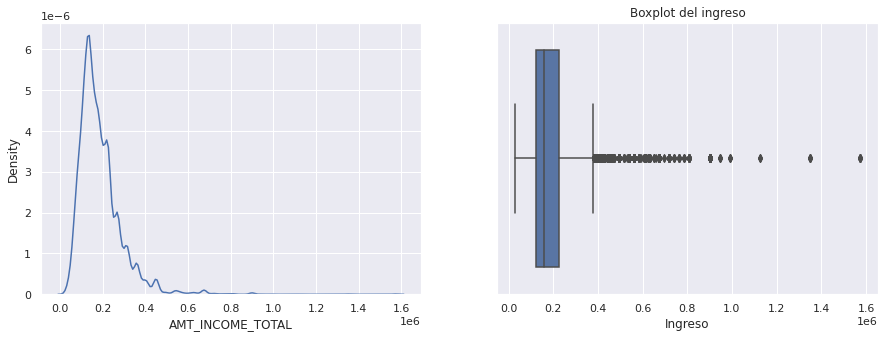

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.kdeplot(data=data,x="AMT_INCOME_TOTAL",ax=axes[0])
plt.xlabel("Ingreso")
plt.title("Densidad del ingreso")

sns.boxplot(data=data,x="AMT_INCOME_TOTAL",ax=axes[1])
plt.xlabel("Ingreso")
plt.title("Boxplot del ingreso")

In [ ]:
mx,mn = dropOL("AMT_INCOME_TOTAL")
data.drop(data[data.AMT_INCOME_TOTAL>mx].index,inplace=True)

#### Cantidad de hijos


Text(0.5, 1.0, 'Boxplot de la cantidad de hijos')

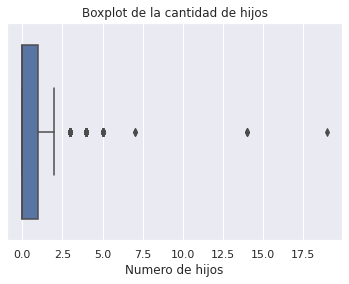

In [ ]:
sns.boxplot(data=data,x="CNT_CHILDREN")
plt.xlabel("Numero de hijos")
plt.title("Boxplot de la cantidad de hijos")

In [ ]:
mx,mn = dropOL("CNT_CHILDREN")
data.drop(data[data.CNT_CHILDREN>6].index,inplace=True)

#### Dias trabajados

<AxesSubplot:xlabel='DAYS_EMPLOYED'>

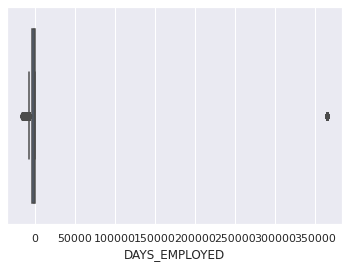

In [ ]:
sns.boxplot(data=data,x="DAYS_EMPLOYED")

In [ ]:
mx,mn = dropOL("DAYS_EMPLOYED")
data.drop(data[data.DAYS_EMPLOYED>mx].index,inplace=True)


In [ ]:
data.head(4)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,ingreso_percap_familiar,SITUACION
31,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,0,0,0,Security staff,2.0,0,C,56250.0,Pago su prestamo
61,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,0,1,1,Sales staff,1.0,0,0,270000.0,Deudor
66,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,0,1,1,Sales staff,1.0,-22,X,270000.0,Nunca pidio un prestamo
71,5008810,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,0,1,1,Sales staff,1.0,0,C,270000.0,Pago su prestamo


  # 5.EDA ( Analisis exploratorio de datos)**  



In [ ]:
 #Separamos la muestra en target y variables predictorias
xData=data[["CODE_GENDER","FLAG_OWN_CAR","OCCUPATION_TYPE","FLAG_OWN_REALTY","CNT_CHILDREN","AMT_INCOME_TOTAL","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","DAYS_EMPLOYED","FLAG_WORK_PHONE","FLAG_PHONE","FLAG_EMAIL","CNT_FAM_MEMBERS","ingreso_percap_familiar", "DAYS_BIRTH"]]
yData=data["SITUACION"]

xData = pd.get_dummies(xData,drop_first=True)  #Transformamos en numericas las variables categoricas

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
yData=labelencoder.fit_transform(data["SITUACION"]) #Transformamos en numerica la variable target

In [ ]:
xData

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
31,1,1,1,0,112500.0,-1134,0,0,0,2.0,...,1,1,0,0,0,1,0,0,0,0
61,0,0,1,0,270000.0,-3051,0,1,1,1.0,...,1,0,0,1,0,1,0,0,0,0
66,0,0,1,0,270000.0,-3051,0,1,1,1.0,...,1,0,0,1,0,1,0,0,0,0
71,0,0,1,0,270000.0,-3051,0,1,1,1.0,...,1,0,0,1,0,1,0,0,0,0
98,0,0,1,0,270000.0,-3051,0,1,1,1.0,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777622,1,1,1,0,315000.0,-2420,0,0,0,2.0,...,1,1,0,0,0,1,0,0,0,0
777634,0,0,1,0,157500.0,-1325,0,1,1,2.0,...,0,1,0,0,0,1,0,0,0,0
777658,0,0,1,0,157500.0,-1325,0,1,1,2.0,...,0,1,0,0,0,1,0,0,0,0
777691,0,0,1,0,283500.0,-655,0,0,0,2.0,...,1,1,0,0,0,1,0,0,0,0


In [ ]:
from collections import Counter  #Identificamos que numero corresponde a cada categoria luego del label encoder.
lista = list(yData)
conteo=Counter(lista)

resultado={}
for clave in conteo:
  valor=conteo[clave]
  if valor != 1:
      resultado[clave] = valor
print(resultado)

print(data["SITUACION"].value_counts())

{2: 14250, 0: 7003, 1: 7619}
Pago su prestamo           14250
Nunca pidio un prestamo     7619
Deudor                      7003
Name: SITUACION, dtype: int64


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,28872.0,5.078984e+06,41846.420553,5008806.0,5042309.750,5079051.5,5115667.25,5150487.0
CODE_GENDER,28872.0,3.595525e-01,0.479878,0.0,0.000,0.0,1.00,1.0
FLAG_OWN_CAR,28872.0,4.039554e-01,0.490697,0.0,0.000,0.0,1.00,1.0
FLAG_OWN_REALTY,28872.0,6.486561e-01,0.477398,0.0,0.000,1.0,1.00,1.0
CNT_CHILDREN,28872.0,5.037753e-01,0.761177,0.0,0.000,0.0,1.00,5.0
AMT_INCOME_TOTAL,28872.0,1.787988e+05,71081.513460,27000.0,127906.875,162000.0,225000.00,378000.0
DAYS_BIRTH,28872.0,4.050443e+01,9.744183,20.0,33.000,40.0,48.00,68.0
DAYS_EMPLOYED,28872.0,-2.639757e+03,2371.296834,-15713.0,-3488.000,-1976.0,-970.00,-17.0
FLAG_WORK_PHONE,28872.0,2.733098e-01,0.445666,0.0,0.000,0.0,1.00,1.0
FLAG_PHONE,28872.0,2.925672e-01,0.454949,0.0,0.000,0.0,1.00,1.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(style="darkgrid")

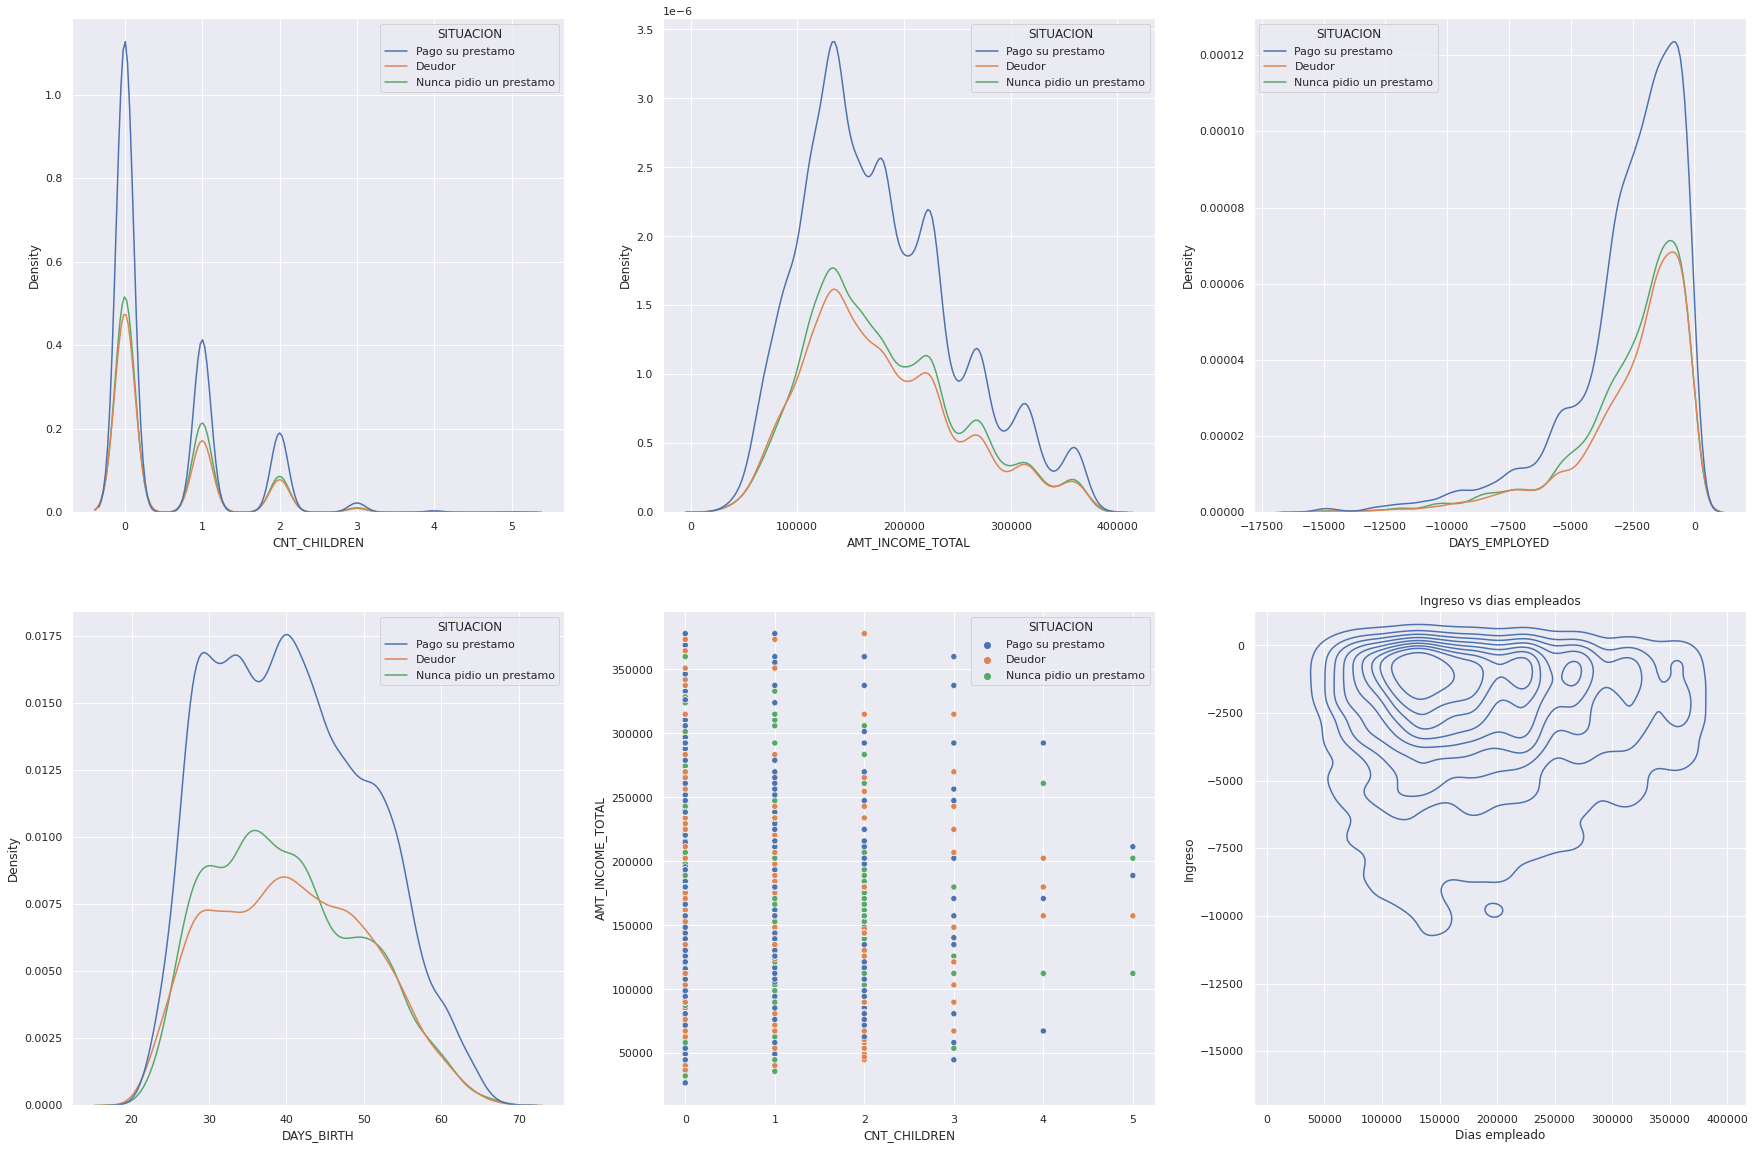

In [ ]:
#Cualitativas
fig, axes = plt.subplots(2, 3, figsize=(30,20))

sns.kdeplot(data=data,x="CNT_CHILDREN",hue="SITUACION",ax = axes[0,0])
plt.xlabel("Cantidad de hijos")
plt.title("Densidad del numero de hijos")

sns.kdeplot(data=data,x="AMT_INCOME_TOTAL",hue="SITUACION", ax = axes[0,1])
plt.xlabel("Ingreso")
plt.title("Densidad del ingreso")

sns.kdeplot(data=data,x="DAYS_EMPLOYED",hue="SITUACION", ax = axes[0,2])
plt.xlabel("Dias empleados ")
plt.title("Densidad de los dias empleados ")

sns.kdeplot(data=data,x="DAYS_BIRTH",hue="SITUACION", ax = axes[1,0])
plt.xlabel("Años de Edad")
plt.title("Densidad según Edad")

sns.scatterplot(data=data,x="CNT_CHILDREN",y="AMT_INCOME_TOTAL",hue="SITUACION",ax = axes[1,1])
plt.xlabel("Cantidad de hijos")
plt.ylabel("Ingreso")
plt.title("Ingreso vs cantidad de hijos")

"""sns.scatterplot(data=data,x="CNT_CHILDREN",y="DAYS_EMPLOYED",hue="SITUACION",ax = axes[1,1])
plt.xlabel("Cantidad de hijos")
plt.ylabel("Dias empleados")
plt.title("Cantidad de hijos vs dias empleados")"""

sns.kdeplot(data=data,x="AMT_INCOME_TOTAL",y="DAYS_EMPLOYED",ax = axes[1,2])
plt.xlabel("Dias empleado")
plt.ylabel("Ingreso")
plt.title("Ingreso vs dias empleados")

plt.show()



**Insight**

Vemos como los clientes que pagaron su prestamo tienen un ingreso mas alto en comparacion a los otros grupos. Los picos dentro del grafico de densidad de la variable ingreso nos hacen pensar que existen varios sub grupos (quintiles).

La variable Days employed (Dias empleados) presenta una asimetria negativa, es entendible ya que eliminamos las observaciones con dias de empleo negativos.


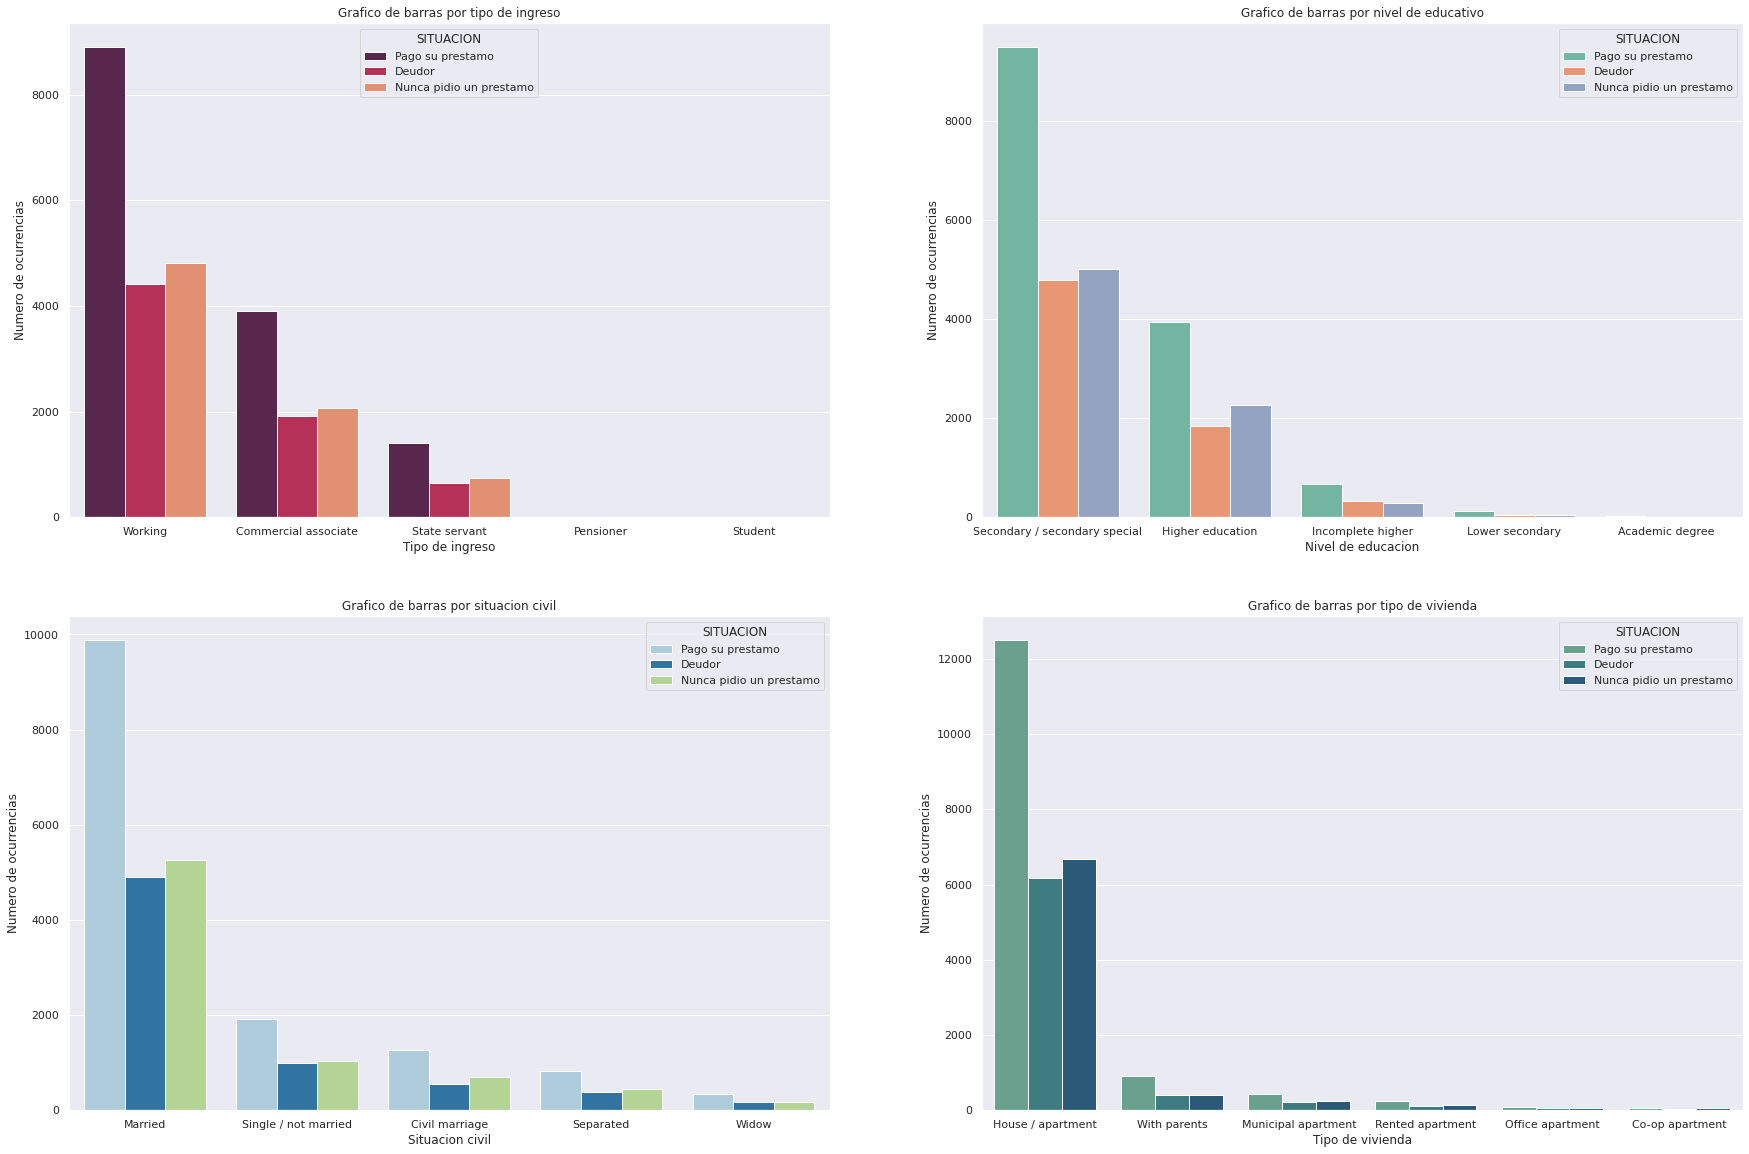

In [ ]:
#Cuantitativas
fig, axes = plt.subplots(2, 2, figsize=(30,20))

sns.countplot(x = 'NAME_INCOME_TYPE', palette='rocket',order = data['NAME_INCOME_TYPE'].value_counts().index, data = data,hue=data["SITUACION"], ax = axes[0,0])
axes[0,0].set_title("Grafico de barras por tipo de ingreso")
axes[0,0].set_xlabel("Tipo de ingreso")
axes[0,0].set_ylabel("Numero de ocurrencias")


sns.countplot(x = 'NAME_EDUCATION_TYPE', palette='Set2',order = data['NAME_EDUCATION_TYPE'].value_counts().index, data = data,hue=data["SITUACION"], ax = axes[0,1])
axes[0,1].set_title("Grafico de barras por nivel de educativo")
axes[0,1].set_xlabel("Nivel de educacion")
axes[0,1].set_ylabel("Numero de ocurrencias")


sns.countplot(x = 'NAME_FAMILY_STATUS', palette="Paired",order = data['NAME_FAMILY_STATUS'].value_counts().index,hue=data["SITUACION"], data = data, ax = axes[1,0])
axes[1,0].set_title("Grafico de barras por situacion civil")
axes[1,0].set_xlabel("Situacion civil")
axes[1,0].set_ylabel("Numero de ocurrencias")

sns.countplot(x = 'NAME_HOUSING_TYPE', palette="crest",  order = data['NAME_HOUSING_TYPE'].value_counts().index,data = data,hue=data["SITUACION"], ax = axes[1,1])
axes[1,1].set_title("Grafico de barras por tipo de vivienda")
axes[1,1].set_xlabel("Tipo de vivienda")
axes[1,1].set_ylabel("Numero de ocurrencias")

plt.show()


Insight

 La parte mayoritaria de nuestras observaciones vive en un casa o apartamento , bajo un estado civil casado, son trabajadores con un nivel educativo maximo de secundaria completa. No vemos a simple vista una categoria dentro de las variables categoricas que por si sola tenga una mayor probabilidad de default.

Text(0, 0.5, 'Numero de ocurrencias')

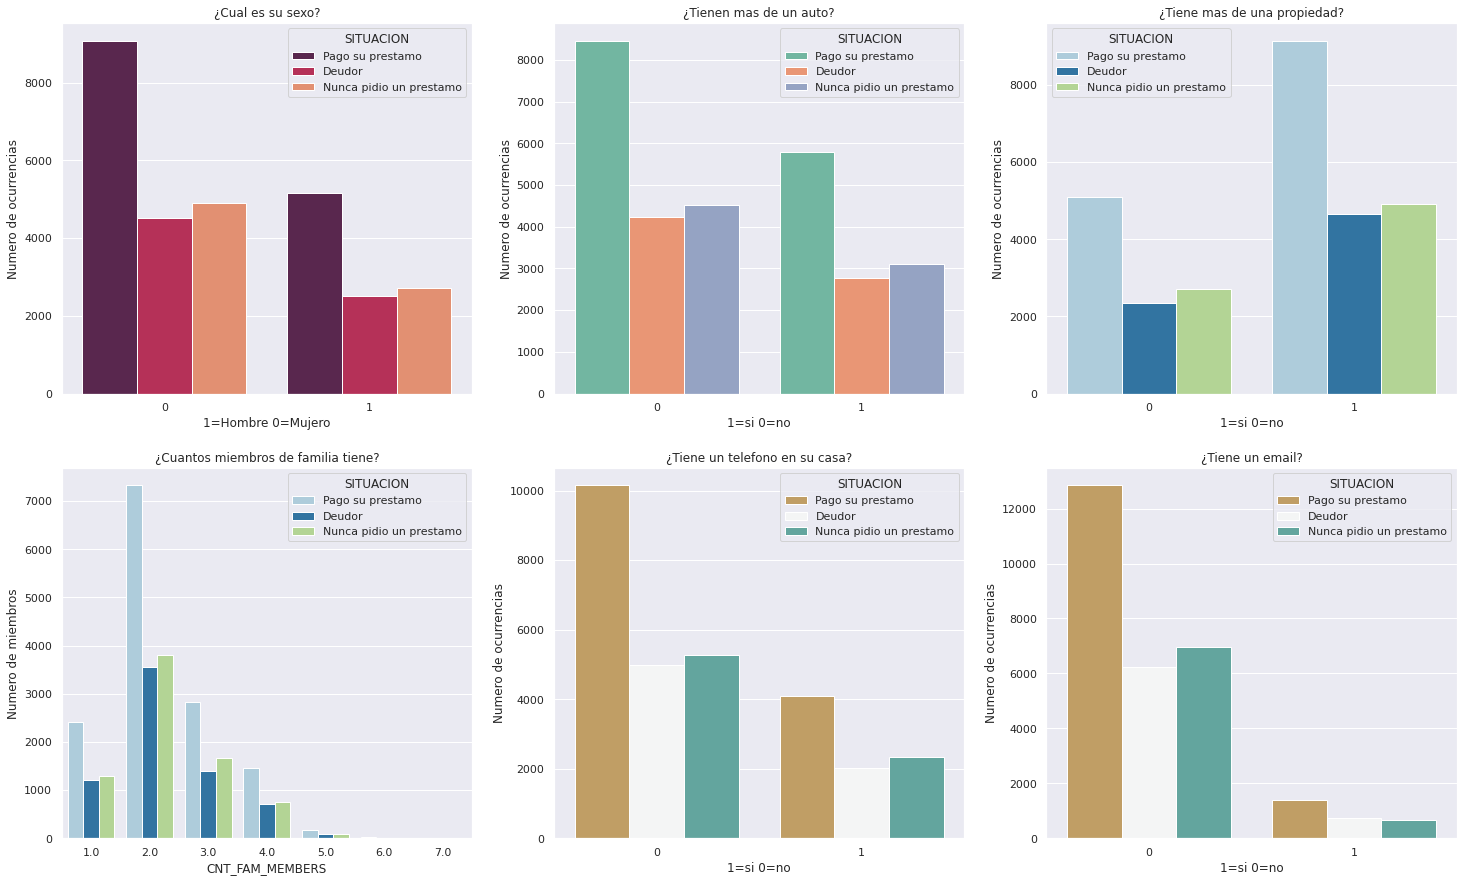

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(25,15))

sns.countplot(x = 'CODE_GENDER', palette='rocket', data = data, ax = axes[0,0],hue="SITUACION")
axes[0,0].set_title("¿Cual es su sexo?")
axes[0,0].set_xlabel("1=Hombre 0=Mujero")
axes[0,0].set_ylabel("Numero de ocurrencias")

sns.countplot(x = 'FLAG_OWN_CAR', palette='Set2', data = data, ax = axes[0,1],hue="SITUACION")
axes[0,1].set_title("¿Tienen mas de un auto?")
axes[0,1].set_xlabel("1=si 0=no")
axes[0,1].set_ylabel("Numero de ocurrencias")

sns.countplot(x = 'FLAG_OWN_REALTY', palette="Paired", data = data, ax = axes[0,2],hue="SITUACION")
axes[0,2].set_title("¿Tiene mas de una propiedad?")
axes[0,2].set_xlabel("1=si 0=no")
axes[0,2].set_ylabel("Numero de ocurrencias")

#CNT_FAM_MEMBERS
sns.countplot(x = 'CNT_FAM_MEMBERS', palette="Paired", data = data, ax = axes[1,0],hue="SITUACION")
axes[1,0].set_title("¿Cuantos miembros de familia tiene?")
#axes[0,2].set_xlabel("1=si 0=no")
axes[1,0].set_ylabel("Numero de miembros")

sns.countplot(x = 'FLAG_PHONE', palette="BrBG", data = data, ax = axes[1,1],hue="SITUACION")
axes[1,1].set_title("¿Tiene un telefono en su casa?")
axes[1,1].set_xlabel("1=si 0=no")
axes[1,1].set_ylabel("Numero de ocurrencias")

sns.countplot(x = 'FLAG_EMAIL', palette="BrBG", data = data, ax = axes[1,2],hue="SITUACION")
axes[1,2].set_title("¿Tiene un email?")
axes[1,2].set_xlabel("1=si 0=no")
axes[1,2].set_ylabel("Numero de ocurrencias")

Insight

Apriori  en la muestra tenemos mas mujeres que pagan sus prestamos que hombres que lo hacen. Tambien vemos que contar con mas de una propiedad  lleva a pagar mas los prestamos.

Text(0, 0.5, 'Numero de ocurrencias')

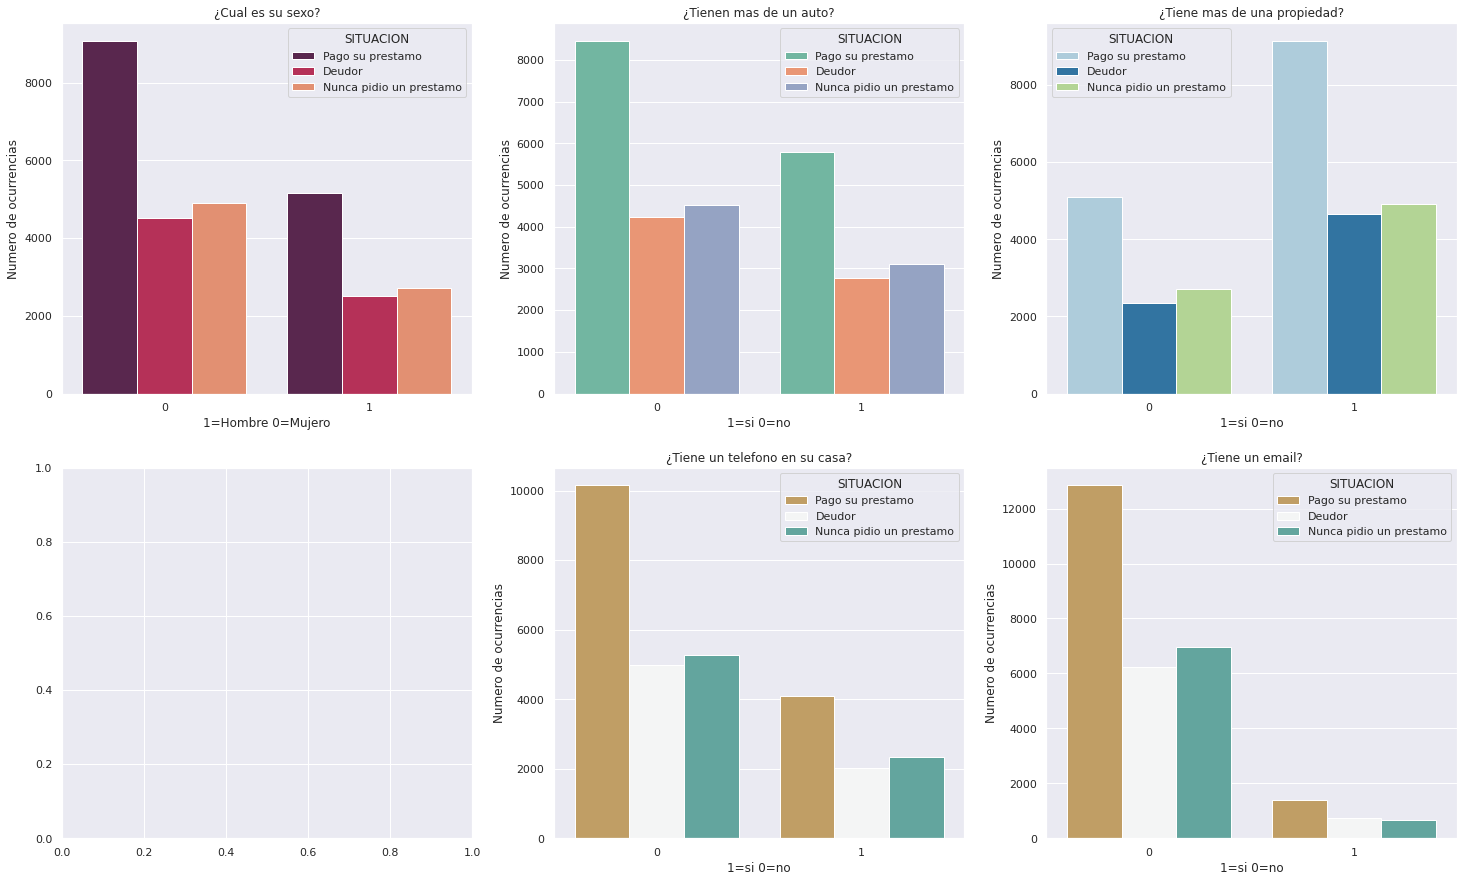

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(25,15))

sns.countplot(x = 'CODE_GENDER', palette='rocket', data = data, ax = axes[0,0],hue="SITUACION")
axes[0,0].set_title("¿Cual es su sexo?")
axes[0,0].set_xlabel("1=Hombre 0=Mujero")
axes[0,0].set_ylabel("Numero de ocurrencias")

sns.countplot(x = 'FLAG_OWN_CAR', palette='Set2', data = data, ax = axes[0,1],hue="SITUACION")
axes[0,1].set_title("¿Tienen mas de un auto?")
axes[0,1].set_xlabel("1=si 0=no")
axes[0,1].set_ylabel("Numero de ocurrencias")

sns.countplot(x = 'FLAG_OWN_REALTY', palette="Paired", data = data, ax = axes[0,2],hue="SITUACION")
axes[0,2].set_title("¿Tiene mas de una propiedad?")
axes[0,2].set_xlabel("1=si 0=no")
axes[0,2].set_ylabel("Numero de ocurrencias")



sns.countplot(x = 'FLAG_PHONE', palette="BrBG", data = data, ax = axes[1,1],hue="SITUACION")
axes[1,1].set_title("¿Tiene un telefono en su casa?")
axes[1,1].set_xlabel("1=si 0=no")
axes[1,1].set_ylabel("Numero de ocurrencias")

sns.countplot(x = 'FLAG_EMAIL', palette="BrBG", data = data, ax = axes[1,2],hue="SITUACION")
axes[1,2].set_title("¿Tiene un email?")
axes[1,2].set_xlabel("1=si 0=no")
axes[1,2].set_ylabel("Numero de ocurrencias")

<ipython-input-162-dc77eb78927a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_1['DAYS_EMPLOYED'] = ml_2
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


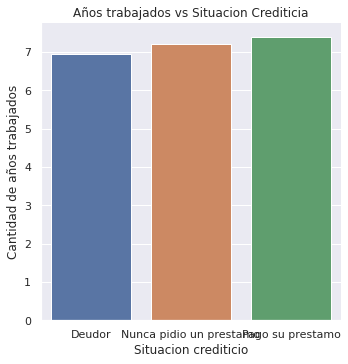

In [ ]:
#Promedio de años trabajados por grupo crediticio
rel_1 = data[["SITUACION", "DAYS_EMPLOYED"]]
ml = rel_1['DAYS_EMPLOYED'].values
ml_1 = ml.tolist()

ml_2=[]

for x in ml_1:
  if x > 100000:
    ml_2.append(0)
  else:
    ml_2.append(x*-1/365)

rel_1['DAYS_EMPLOYED'] = ml_2

rel_1.drop(rel_1.loc[rel_1['DAYS_EMPLOYED']==0].index, inplace=True)

sub_r1=rel_1.groupby("SITUACION").mean().reset_index()


sns.catplot(x = "SITUACION", y = "DAYS_EMPLOYED", kind = "bar", data = sub_r1)
plt.title("Años trabajados vs Situacion Crediticia")
plt.ylabel("Cantidad de años trabajados")
plt.xlabel("Situacion crediticio")

plt.show()

## Modelos


<ipython-input-163-f9f0dc803cbb>:17: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  ModeloKmeans=KMeans(n_clusters=k).fit(y_array)
<ipython-input-163-f9f0dc803cbb>:18: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  ModeloKmeans.fit(y_array)
<ipython-input-163-f9f0dc803cbb>:17: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  ModeloKmeans=KMeans(n_clusters=k).fit(y_array)
<ipython-input-163-f9f0dc803cbb>:18: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  ModeloKmeans.fit(y_array)
<ipython-input-163-f9f0dc803cbb>:17: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  ModeloKmeans=KMeans(n_cluster

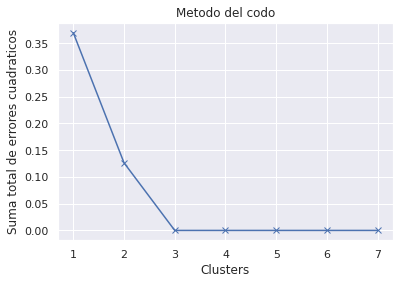

In [ ]:
#Metodo del codo                                Se uso como criterio para conformar los 3 grupos con los que venimos trabajando
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler


#plt.scatter(x=range(len(y)),y=y)
y_array=yData.reshape(-1,1)

scaler=MinMaxScaler()
y_array=scaler.fit_transform(y_array)

grupo=[]
K=range(1,8)

for k in K:
  ModeloKmeans=KMeans(n_clusters=k).fit(y_array)
  ModeloKmeans.fit(y_array)
  grupo.append(sum(np.min(cdist(y_array,ModeloKmeans.cluster_centers_ ,"euclidean"),axis=1))/ y_array.shape[0])

plt.plot(K,grupo,"bx-")
plt.xlabel("Clusters")
plt.ylabel("Suma total de errores cuadraticos")
plt.title("Metodo del codo")
plt.show()

In [ ]:
from sklearn import preprocessing

# Escalado estándar de los datos
scaler = preprocessing.StandardScaler().fit(xData)
X_scaled = scaler.transform(xData)




              precision    recall  f1-score   support

           0       0.45      0.24      0.32      2097
           1       0.57      0.42      0.48      2264
           2       0.60      0.82      0.70      4301

    accuracy                           0.58      8662
   macro avg       0.54      0.50      0.50      8662
weighted avg       0.56      0.58      0.55      8662



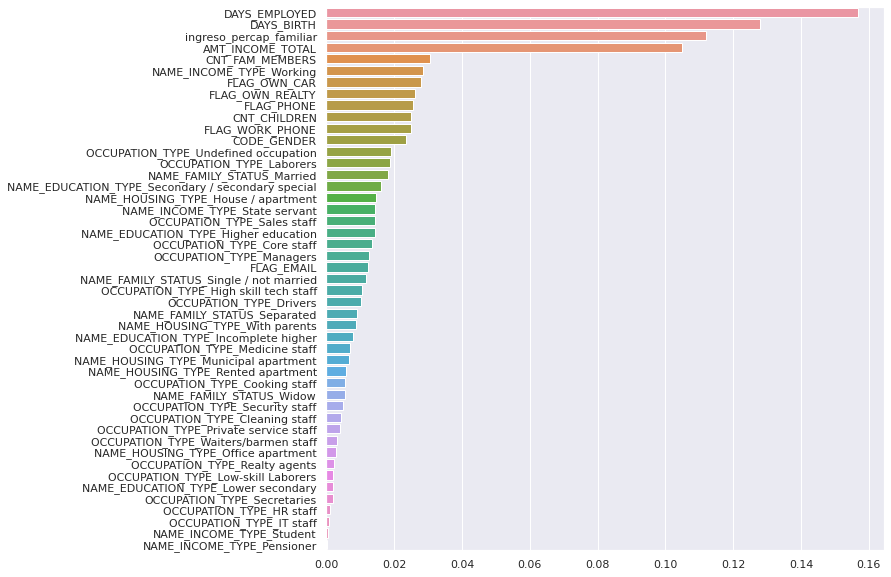

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import time



X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,yData,random_state=1234,test_size=0.3)

#Modelo

rfm=RandomForestClassifier(n_estimators=500, max_features="sqrt", max_depth=25, min_samples_split=10, min_samples_leaf=2, bootstrap=False, criterion="entropy", n_jobs=-1, random_state=42)
model=rfm.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

print(metrics.classification_report(Y_test,Y_pred))

#Graficamos la importancia de cada variable a la hora de la prediccion.
variables=xData.columns
start_time=time.time()
importances = rfm.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfm.estimators_], axis=0)
elapsed_time = time.time() - start_time

forest_importances = pd.Series(importances, index=variables)
Importancia=forest_importances.sort_values(ascending=False)

plt.figure(figsize=(10,10))
sns.barplot(x=Importancia,y=Importancia.keys())
fig.tight_layout()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler


X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,yData,random_state=1234,test_size=0.3)



n=10

knn=KNeighborsClassifier(n_neighbors=1,leaf_size=49,p=1)
model=knn.fit(X_train,Y_train)
pred=model.predict(X_test)

print(metrics.classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.36      0.36      0.36      2097
           1       0.45      0.46      0.46      2264
           2       0.63      0.62      0.62      4301

    accuracy                           0.52      8662
   macro avg       0.48      0.48      0.48      8662
weighted avg       0.52      0.52      0.52      8662



In [ ]:
from sklearn import tree

X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,yData,random_state=1234,test_size=0.3)

clf=tree.DecisionTreeClassifier(random_state=0,max_depth= 20,max_features="auto",min_samples_leaf=1,min_samples_split=2)
model=clf.fit(X_train,Y_train)
pred=model.predict(X_test)

print(metrics.classification_report(Y_test,pred))



              precision    recall  f1-score   support

           0       0.35      0.22      0.27      2097
           1       0.47      0.34      0.39      2264
           2       0.56      0.75      0.64      4301

    accuracy                           0.51      8662
   macro avg       0.46      0.44      0.44      8662
weighted avg       0.49      0.51      0.49      8662



In [ ]:
#Prediccion de un cliente aleatorio con el modelo

NumeroCliente = 1
NC = NumeroCliente
X_test_list = X_test.tolist()

print(X_test_list[NC])
decode = labelencoder.inverse_transform(Y_test)
print("El grupo crediticio es : " + decode[NC])

#Jessica no tiene mas de un auto, tiene mas de una casa, no tiene hijos, su ingreso es de 216000 mil dorales al año, tiene trabajo
# (trabajadora sin especificar en que), asistio a la secundaria , esta casada y vive en una casa o apartamento

[1.3346291426698051, 1.2147102032955128, -1.3587547648641418, 1.965706125494971, 1.5996160523453993, -1.820656725503279, -0.6132717078861764, 1.5549978235755608, -0.32958767914538595, 1.850603843655571, -0.3457285923269247, -0.05176853782930828, -0.1387068662069052, -0.15128350936398952, -0.36662671845039074, -0.27660453198401136, -0.05304129693921577, -0.22139004562471032, -0.04288431538517355, -0.5185861254057685, -0.07809096246015347, -0.30782462613476974, -0.20715422723700003, -0.10752631662076503, -0.05238055395407428, -0.36449589155916334, -0.07153665824306343, -0.14115132476020192, 2.214836821907759, -0.07764074060859381, -0.022025760030645394, -0.3282945458404809, -0.019522734816978648, -1.3001046432840058, -0.6209232140749271, -0.216613617148351, -0.08641396795201946, 0.7042982777522385, 0.6637580831408659, -0.24785391870210985, -0.39869730068343123, -0.15635652172143055, 0.37225743437115316, -0.18192955989027917, -0.08661714566343648, -0.1342300277999479, -0.25090954492590317

# k fold

In [ ]:
#organizando dataset para el kfold
data_kfold = data

column_to_move = data_kfold.pop("STATUS")
data_kfold.insert(18, "STATUS", column_to_move)
data_k=data_kfold.drop("ID",1)
data_k=data_kfold.drop("STATUS",1)

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_k['SITUACION'] = labelencoder.fit_transform(data_k["SITUACION"])

data_kn=pd.get_dummies(data_k,drop_first=True)
column_to_move2 = data_kn.pop("SITUACION")
data_kn.insert(49, "SITUACION", column_to_move2)
data_knf = data_kn.values

<ipython-input-169-d4a703480659>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_k=data_kfold.drop("ID",1)
<ipython-input-169-d4a703480659>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_k=data_kfold.drop("STATUS",1)


In [ ]:
data.dtypes

ID                           int64
CODE_GENDER                  int64
FLAG_OWN_CAR                 int64
FLAG_OWN_REALTY              int64
CNT_CHILDREN                 int64
AMT_INCOME_TOTAL           float64
NAME_INCOME_TYPE            object
NAME_EDUCATION_TYPE         object
NAME_FAMILY_STATUS          object
NAME_HOUSING_TYPE           object
DAYS_BIRTH                   int64
DAYS_EMPLOYED                int64
FLAG_WORK_PHONE              int64
FLAG_PHONE                   int64
FLAG_EMAIL                   int64
OCCUPATION_TYPE             object
CNT_FAM_MEMBERS            float64
MONTHS_BALANCE               int64
STATUS                      object
ingreso_percap_familiar    float64
SITUACION                   object
dtype: object

In [ ]:
# Separar en X y y
X, y = data_knf[:, :-1], data_knf[:, -1]
print(X.shape, y.shape)

(28872, 49) (28872,)


In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
skf.get_n_splits(xData, yData)

train, test = list(skf.split(X, y))[1]
X[train]

array([[5.008806e+06, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [5.008808e+06, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [5.008809e+06, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [5.149838e+06, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [5.150049e+06, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [5.150337e+06, 1.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [ ]:
train, test = list(skf.split(X, y))[0]

In [ ]:
from sklearn.metrics import accuracy_score
# Modelo vacio
model = RandomForestClassifier()
# Lista para guardar accuracy
list_ac=[]
for i in range(0,skf.get_n_splits(X, y)):
  # Calculo de indices
  train, test = list(skf.split(X, y))[i]
  # Separar train y test
  X_train_n, y_train_n, X_test_n, y_test_n= X[train], y[train], X[test],y[test]
  # Ajustar el modelo
  model.fit(X_train_n, y_train_n)
  # Predicciones
  pred= model.predict(X_test_n)
  # Calculo del error
  accuracy= accuracy_score(y_true=y_test_n, y_pred= pred)
  print('Iteracion: ',i+1, ' Accuracy:', accuracy)
  list_ac.append(accuracy)
# Promedio de accuracy
import numpy as np
print('Accuracy promedio:', np.mean(list_ac))

Iteracion:  1  Accuracy: 0.574025974025974
Iteracion:  2  Accuracy: 0.57004329004329
Iteracion:  3  Accuracy: 0.5732594388638725
Iteracion:  4  Accuracy: 0.5770696224454451
Iteracion:  5  Accuracy: 0.5758572913058538
Accuracy promedio: 0.574051123336887




# HIPERPARAMETRIZACION

 ### Random Forest



In [ ]:
pip install scikit-optimize


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 3.7 MB/s eta 0:00:00


In [ ]:
from skopt import gp_minimize
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,yData,random_state=1234,test_size=0.3)


def objective(params):
    n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf, bootstrap, criterion = params
    clf = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, bootstrap=bootstrap, criterion=criterion, n_jobs=-1, random_state=42)
    score = cross_val_score(clf, X_train, Y_train, cv=5, scoring='accuracy').mean()
    return -score

space = [(100, 500), # n_estimators
         ('sqrt', 'log2'), # max_features
         (2, 25), # max_depth
         (2, 10), # min_samples_split
         (1, 4), # min_samples_leaf
         (True, False), # bootstrap
         ('gini', 'entropy')] # criterion

result = gp_minimize(objective, space, n_calls=50, random_state=42)
print('Best Score: %f' % (-result.fun))
print('Best Params:', result.x)


Best Score: 0.570559
Best Params: [500, 'sqrt', 25, 10, 2, False, 'entropy']


### Arbol de decicion

In [ ]:
from skopt import BayesSearchCV
from sklearn.tree import DecisionTreeClassifier
from skopt.space import Real, Categorical, Integer

X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,yData,random_state=1234,test_size=0.3)

# Definir los parámetros a optimizar
parametros = {'max_depth': Integer(1, 20),
              'min_samples_split': Integer(2, 20),
              'min_samples_leaf': Integer(1, 20),
              'max_features': Categorical(['auto', 'sqrt', 'log2'])}

# Definir el modelo a utilizar
modelo = DecisionTreeClassifier()

# Definir la búsqueda bayesiana
busqueda_bayesiana = BayesSearchCV(modelo, parametros, n_iter=100, cv=5, n_jobs=-1)

# Ajustar la búsqueda a los datos de entrenamiento
busqueda_bayesiana.fit(X_train, Y_train)

# Imprimir el mejor conjunto de parámetros y la precisión correspondiente
print("Mejor conjunto de parámetros: ", busqueda_bayesiana.best_params_)
print("Precisión correspondiente: ", busqueda_bayesiana.best_score_)


### KNeighborsClassifier

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from skopt import gp_minimize
from skopt.space import Real, Integer

X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,yData,random_state=1234,test_size=0.3)

# Definir la función de pérdida
def loss(params):
    n_neighbors, leaf_size, p = params
    model = KNeighborsClassifier(n_neighbors=n_neighbors, leaf_size=leaf_size, p=p)
    loss = -cross_val_score(model, X_train,Y_train, cv=5, n_jobs=-1, scoring='accuracy').mean()
    return loss

# Definir los límites de búsqueda para cada hiperparámetro
space = [Integer(1, 10, name='n_neighbors'),
         Integer(10, 50, name='leaf_size'),
         Integer(1, 3, name='p')]

# Ejecutar el proceso de optimización
result = gp_minimize(loss, space, n_calls=100, random_state=0, n_random_starts=10, verbose=True)
print('Mejor precisión encontrada: ', -result.fun)
print('Mejores hiperparámetros: ', result.x)


Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 251.6449
Function value obtained: -0.4951
Current minimum: -0.4951
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 6.6184
Function value obtained: -0.4918
Current minimum: -0.4951
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 7.7911
Function value obtained: -0.4971
Current minimum: -0.4971
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 6.7988
Function value obtained: -0.4978
Current minimum: -0.4978
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 8.3791
Function value obtained: -0.4978
Current minimum: -0.4978
Iteration No: 6 started

/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 12.5579
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 25 started. Searching for the next optimal point.
Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 15.7621
Function value obtained: -0.4968
Current minimum: -0.5107
Iteration No: 26 started. Searching for the next optimal point.
Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 8.2209
Function value obtained: -0.4918
Current minimum: -0.5107
Iteration No: 27 started. Searching for the next optimal point.
Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 7.0901
Function value obtained: -0.4978
Current minimum: -0.5107
Iteration No: 28 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 12.4117
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 29 started. Searching for the next optimal point.
Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 15.1522
Function value obtained: -0.4981
Current minimum: -0.5107
Iteration No: 30 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 12.2450
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 31 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 31 ended. Search finished for the next optimal point.
Time taken: 12.2439
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 32 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 32 ended. Search finished for the next optimal point.
Time taken: 12.4435
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 33 started. Searching for the next optimal point.
Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 7.6296
Function value obtained: -0.4912
Current minimum: -0.5107
Iteration No: 34 started. Searching for the next optimal point.
Iteration No: 34 ended. Search finished for the next optimal point.
Time taken: 8.2829
Function value obtained: -0.4918
Current minimum: -0.5107
Iteration No: 35 started. Searching for the next optimal point.
Iteration No: 35 ended. Search finished for the next optimal point.
Time taken: 14.1084
Function value obtained: -0.5083
Current minimum: -0.5107
Iteration No: 36 started. Searching for the next optimal point.
Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 7.7854
Function value obtained: -0.4912
Current minimum: -0.5107
Iteration No: 37 

/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 12.5410
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 46 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 46 ended. Search finished for the next optimal point.
Time taken: 12.3136
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 47 started. Searching for the next optimal point.
Iteration No: 47 ended. Search finished for the next optimal point.
Time taken: 14.2356
Function value obtained: -0.4896
Current minimum: -0.5107
Iteration No: 48 started. Searching for the next optimal point.
Iteration No: 48 ended. Search finished for the next optimal point.
Time taken: 7.3989
Function value obtained: -0.5001
Current minimum: -0.5107
Iteration No: 49 started. Searching for the next optimal point.
Iteration No: 49 ended. Search finished for the next optimal point.
Time taken: 9.7237
Function value obtained: -0.4863
Current minimum: -0.5107
Iteration No: 50 started. Searching for the next optimal point.
Iteration No: 50 ended. Search finished for the next optimal point.
Time taken: 235.3259
Function value obtained: -0.4474
Current minimum: -0.5107
Iteration No: 5

/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 52 ended. Search finished for the next optimal point.
Time taken: 13.2128
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 53 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 53 ended. Search finished for the next optimal point.
Time taken: 13.0952
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 54 started. Searching for the next optimal point.
Iteration No: 54 ended. Search finished for the next optimal point.
Time taken: 236.3791
Function value obtained: -0.4951
Current minimum: -0.5107
Iteration No: 55 started. Searching for the next optimal point.
Iteration No: 55 ended. Search finished for the next optimal point.
Time taken: 8.7199
Function value obtained: -0.5001
Current minimum: -0.5107
Iteration No: 56 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 56 ended. Search finished for the next optimal point.
Time taken: 12.8815
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 57 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 57 ended. Search finished for the next optimal point.
Time taken: 13.2210
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 58 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 58 ended. Search finished for the next optimal point.
Time taken: 13.0766
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 59 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 59 ended. Search finished for the next optimal point.
Time taken: 13.1471
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 60 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 60 ended. Search finished for the next optimal point.
Time taken: 12.9877
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 61 started. Searching for the next optimal point.
Iteration No: 61 ended. Search finished for the next optimal point.
Time taken: 8.5336
Function value obtained: -0.4918
Current minimum: -0.5107
Iteration No: 62 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 62 ended. Search finished for the next optimal point.
Time taken: 12.9250
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 63 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 63 ended. Search finished for the next optimal point.
Time taken: 12.9856
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 64 started. Searching for the next optimal point.
Iteration No: 64 ended. Search finished for the next optimal point.
Time taken: 15.6300
Function value obtained: -0.5083
Current minimum: -0.5107
Iteration No: 65 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 65 ended. Search finished for the next optimal point.
Time taken: 13.0733
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 66 started. Searching for the next optimal point.
Iteration No: 66 ended. Search finished for the next optimal point.
Time taken: 8.5459
Function value obtained: -0.5005
Current minimum: -0.5107
Iteration No: 67 started. Searching for the next optimal point.
Iteration No: 67 ended. Search finished for the next optimal point.
Time taken: 235.8896
Function value obtained: -0.4878
Current minimum: -0.5107
Iteration No: 68 started. Searching for the next optimal point.
Iteration No: 68 ended. Search finished for the next optimal point.
Time taken: 237.4319
Function value obtained: -0.5063
Current minimum: -0.5107
Iteration No: 69 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 69 ended. Search finished for the next optimal point.
Time taken: 12.8442
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 70 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 70 ended. Search finished for the next optimal point.
Time taken: 12.7200
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 71 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 71 ended. Search finished for the next optimal point.
Time taken: 12.9155
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 72 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 72 ended. Search finished for the next optimal point.
Time taken: 12.9354
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 73 started. Searching for the next optimal point.
Iteration No: 73 ended. Search finished for the next optimal point.
Time taken: 14.8170
Function value obtained: -0.4896
Current minimum: -0.5107
Iteration No: 74 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 74 ended. Search finished for the next optimal point.
Time taken: 13.2295
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 75 started. Searching for the next optimal point.
Iteration No: 75 ended. Search finished for the next optimal point.
Time taken: 8.7370
Function value obtained: -0.5001
Current minimum: -0.5107
Iteration No: 76 started. Searching for the next optimal point.
Iteration No: 76 ended. Search finished for the next optimal point.
Time taken: 7.8909
Function value obtained: -0.4978
Current minimum: -0.5107
Iteration No: 77 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 77 ended. Search finished for the next optimal point.
Time taken: 14.0726
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 78 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 78 ended. Search finished for the next optimal point.
Time taken: 7.7992
Function value obtained: -0.4912
Current minimum: -0.5107
Iteration No: 79 started. Searching for the next optimal point.
Iteration No: 79 ended. Search finished for the next optimal point.
Time taken: 9.1319
Function value obtained: -0.5005
Current minimum: -0.5107
Iteration No: 80 started. Searching for the next optimal point.
Iteration No: 80 ended. Search finished for the next optimal point.
Time taken: 237.6089
Function value obtained: -0.4959
Current minimum: -0.5107
Iteration No: 81 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 81 ended. Search finished for the next optimal point.
Time taken: 13.3673
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 82 started. Searching for the next optimal point.
Iteration No: 82 ended. Search finished for the next optimal point.
Time taken: 237.7150
Function value obtained: -0.4959
Current minimum: -0.5107
Iteration No: 83 started. Searching for the next optimal point.
Iteration No: 83 ended. Search finished for the next optimal point.
Time taken: 7.1566
Function value obtained: -0.5101
Current minimum: -0.5107
Iteration No: 84 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 84 ended. Search finished for the next optimal point.
Time taken: 12.7958
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 85 started. Searching for the next optimal point.
Iteration No: 85 ended. Search finished for the next optimal point.
Time taken: 8.0939
Function value obtained: -0.4912
Current minimum: -0.5107
Iteration No: 86 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 86 ended. Search finished for the next optimal point.
Time taken: 13.6358
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 87 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 87 ended. Search finished for the next optimal point.
Time taken: 14.1478
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 88 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 88 ended. Search finished for the next optimal point.
Time taken: 13.0225
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 89 started. Searching for the next optimal point.
Iteration No: 89 ended. Search finished for the next optimal point.
Time taken: 7.8675
Function value obtained: -0.5001
Current minimum: -0.5107
Iteration No: 90 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 90 ended. Search finished for the next optimal point.
Time taken: 13.3758
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 91 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 91 ended. Search finished for the next optimal point.
Time taken: 13.7335
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 92 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 92 ended. Search finished for the next optimal point.
Time taken: 14.0278
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 93 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 93 ended. Search finished for the next optimal point.
Time taken: 13.2651
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 94 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 94 ended. Search finished for the next optimal point.
Time taken: 14.1620
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 95 started. Searching for the next optimal point.
Iteration No: 95 ended. Search finished for the next optimal point.
Time taken: 15.4427
Function value obtained: -0.4981
Current minimum: -0.5107
Iteration No: 96 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 96 ended. Search finished for the next optimal point.
Time taken: 13.8041
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 97 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 97 ended. Search finished for the next optimal point.
Time taken: 13.7302
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 98 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 98 ended. Search finished for the next optimal point.
Time taken: 13.6130
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 99 started. Searching for the next optimal point.


/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 99 ended. Search finished for the next optimal point.
Time taken: 13.6892
Function value obtained: -0.5107
Current minimum: -0.5107
Iteration No: 100 started. Searching for the next optimal point.
Iteration No: 100 ended. Search finished for the next optimal point.
Time taken: 9.3828
Function value obtained: -0.5005
Current minimum: -0.5107
Mejor precisión encontrada:  0.5107372587827808
Mejores hiperparámetros:  [1, 49, 1]
